In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Boston Housing Dataset

In [2]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Define categorical and numerical features
categorical_features = ["CHAS", "RAD"]
numerical_features = [col for col in df.columns if col not in ["MEDV"] + categorical_features]

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Create transformers
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")), 
    ("scaler", StandardScaler())  
])

cat_transformer = OneHotEncoder(handle_unknown="ignore")

In [11]:
from sklearn.compose import ColumnTransformer

# Combine transformers
preprocessor = ColumnTransformer([
    ("num", num_transformer, numerical_features),
    ("cat", cat_transformer, categorical_features)
])

In [12]:
# Adding polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [13]:
from sklearn.model_selection import train_test_split

# Split data
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Transform data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [15]:
# Generate polynomial features
X_train_poly = poly.fit_transform(X_train_transformed)
X_test_poly = poly.transform(X_test_transformed)

In [16]:
from sklearn.linear_model import LinearRegression

# Train Linear Model
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)
y_pred_linear = linear_model.predict(X_test_poly)

In [17]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)

In [18]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, y_train)
y_pred_lasso = lasso_model.predict(X_test_poly)

### Evaluation Metrics

from sklearn.metrics import mean_squared_error, r2_score

def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  - MSE: {mse:.2f}")
    print(f"  - R² Score: {r2:.4f}\n")

In [22]:
evaluate(y_test, y_pred_linear, "Polynomial Regression (Linear)")
evaluate(y_test, y_pred_ridge, "Polynomial Regression (Ridge)")
evaluate(y_test, y_pred_lasso, "Polynomial Regression (Lasso)")

Polynomial Regression (Linear) Performance:
  - MSE: 15.69
  - R² Score: 0.7860

Polynomial Regression (Ridge) Performance:
  - MSE: 15.02
  - R² Score: 0.7952

Polynomial Regression (Lasso) Performance:
  - MSE: 13.76
  - R² Score: 0.8124



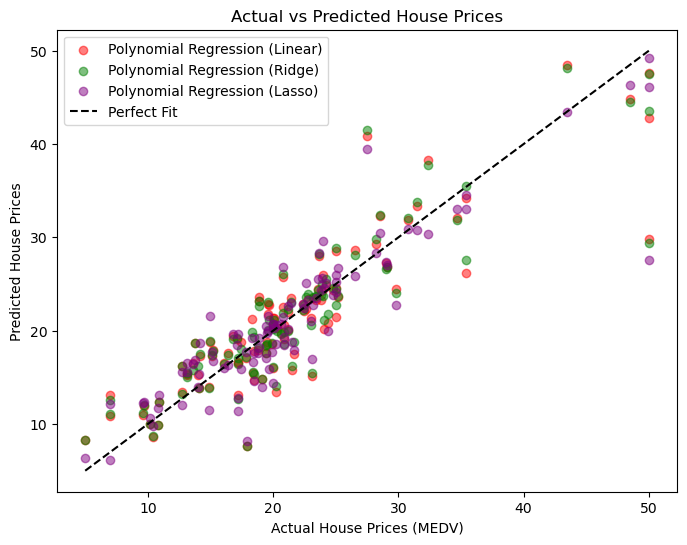

In [26]:
# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot actual vs predicted values
plt.scatter(y_test, y_pred_linear, color="red", alpha=0.5, label="Polynomial Regression (Linear)")
plt.scatter(y_test, y_pred_ridge, color="green", alpha=0.5, label="Polynomial Regression (Ridge)")
plt.scatter(y_test, y_pred_lasso, color="purple", alpha=0.5, label="Polynomial Regression (Lasso)")

# Plot perfect fit line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="dashed", color="black", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual House Prices (MEDV)")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()